# Genetic Algorithm for Inversion of Gravity Anomaly Data

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [12]:
#generate population
population_density = np.linspace(-0.2, 1, 5000)
population_t = np.linspace(0, 10000, 50000)
population_Z = np.linspace(300, 15000, 50000)
population_alpha = np.linspace(0, math.pi, 20000)
population_h = np.linspace(000, 15000, 50000)

In [31]:
#generating a synthetic data with following parametric values
G = 6.67 * 10 ** -3   #
density = 1.0
t = 1500
h =800
z = 2500
alpha = np.pi *30/180

x = np.linspace(-8000,8000,50)
g = 2*G*density*t*((np.pi-np.arctan((x-h*(1/np.tan(alpha)))/(z-h)))-np.arctan((x + h*(1/np.tan(alpha)))/(z+h)))

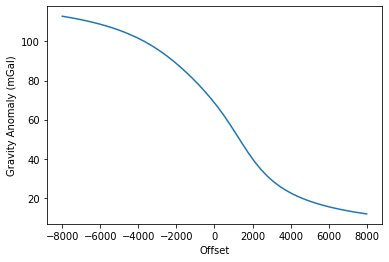

In [51]:
plt.plot(x, g)
plt.xlabel("Offset")
plt.ylabel("Gravity Anomaly (mGal)")
plt.show()
P1 = [1, 2, 3, 4, 5] #Array used in the code 

In [15]:
#Misfit function is defines below. It works better than simple MSE function
def misfit(z2, h2, alpha2, density2, t2):
    gi = 0
    ga = 2 * G * density2 * t2 * ((np.pi - np.arctan((x - h2 * (1 / np.tan(alpha2))) / (z2 - h2))) - np.arctan(
        (x + h2 * (1 / np.tan(alpha2))) / (z2 + h2)))
    for j in range(len(x)):
        gi = ((g[j] - ga[j]) / g[j]) ** 2 + gi
    fit = (100 / len(x)) * ((gi / 2) ** 0.5)
    return (fit)

In [16]:
# P2_array is for array of ga values
P2_array = []
# fit_array is for fitness value of each parent
fit_array = []

In [17]:
#Function for generating the parent population
def parent_generation(x):
    for i in range(10000):  # Range should be equal to number of parents to generate
        density2 = random.choice(population_density)
        z2 = random.choice(population_Z)
        h2 = random.choice(population_h)
        alpha2 = random.choice(population_alpha)
        t2 = random.choice(population_t)

        P2 = [z2, h2, alpha2, density2, t2]
        P2_array.append(P2)

        ft = misfit(P2[0], P2[1], P2[2], P2[3], P2[4])
        fit_array.append(ft)
    return (P2_array, fit_array)

In [18]:
#Tournament Selection Function
def tournament(P2_array, fit_array):
    parent_group = np.zeros(shape=(200, len(P1)))
    tour_fit = np.zeros(200)
    for i in range(200):
        k = random.randint(0, 9999)
        l = P2_array[k]
        m = fit_array[k]
        parent_group[i] = l
        tour_fit[i] = m
    AAA = np.argmin(tour_fit)
    mn1 = tour_fit[AAA]
    tour_fit[AAA] = 1010000
    hh = np.argmin(tour_fit)
    mn2 = tour_fit[hh]

    parent1 = parent_group[AAA]
    parent2 = parent_group[hh]
    return (parent1, parent2)

In [19]:
#Corssover Function
def crossover(parent1, parent2):
    s = 3
    u = np.random.uniform(0, 1, 1000)
    n = random.randint(0, 999)
    parent1, parent2 = tournament(P2_array, fit_array)
    beta = abs(-2 * s * (math.log(1 - u[n])) ** 0.5)
    offspring1 = np.zeros(len(P1))
    offspring2 = np.zeros(len(P1))

    for i in range(len(P1)):
        offspring1[i] = parent1[i] * np.log(beta) + parent2[i] * (1 - np.log(beta))
        offspring2[i] = parent2[i] * np.log(beta) + parent1[i] * (1 - np.log(beta))
    parent1 = offspring1
    parent2 = offspring2
    return (parent1, parent2)

In [20]:
#Mutation Function
def mutation(parent1, parent2):
    b = 1.0
    r = np.random.uniform(0, 1, 1000)
    n = random.randint(0, 999)

    r2 = np.random.uniform(0, 1, 1000)
    n2 = random.randint(0, 999)
    if r2[n2] < 0.5:
        x = parent1[0]
        dif1 = []
        for i in range(len(parent1)):
            z = parent1[i] - x
            dif1.append(z)

        x2 = parent1[len(parent1) - 1]
        dif2 = []
        for i2 in range(len(parent1)):
            z2 = x2 - parent1[i2]
            dif2.append(z2)

        for i in range(len(parent1) - 1):
            t = dif1[i] / dif2[i]

            if (r[n] < t):
                t1 = t - (t * ((t - r[n]) / t) ** b)
            elif (r[n] == t):
                t1 = t
            else:
                t1 = t + (1 - t) * (((r[n] - t) / (1 - t)) ** b)
                k = t1 * parent1[len(parent1) - 1]
                parent1[i] = (1 - t1) * parent1[i] + k


    else:
        x = parent2[0]
        dif1 = []
        for i in range(len(parent1)):
            z = parent2[i] - x
            dif1.append(z)

        x2 = parent2[len(parent2) - 1]
        dif2 = []
        for i2 in range(len(parent2)):
            z2 = x2 - parent2[i2]
            dif2.append(z2)

        for i in range(len(parent2) - 1):
            t = dif1[i] / dif2[i]

            if (r[n] < t):
                t1 = t - (t * ((t - r[n]) / t) ** b)
            elif (r[n] == t):
                t1 = t
            else:
                t1 = t + (1 - t) * (((r[n] - t) / (1 - t)) ** b)
                k = t1 * parent2[len(parent2) - 1]
                parent1[i] = (1 - t1) * parent2[i] + k

    return (parent1, parent2)

In [21]:
iteration = []
depth = []
hvalue = []
angle = []
density = []
thickness = []

In [23]:
#Final GA code after combining all the above functions
parent1, parent2 = parent_generation(x)
for i in range(5000):  #Range is equal to number of iterations

    parent1, parent2 = tournament(P2_array, fit_array)
    r = random.randint(0, 100) 

    if r <= 97: #This conditional leads to crossover of parents
        parent1, parent2 = crossover(parent1, parent2)

        pos1 = np.argmax(fit_array)
        value1 = misfit(parent1[0], parent1[1], parent1[2], parent1[3], parent1[4])
        fit_array[pos1] = value1
        P2_array[pos1] = parent1

        pos2 = np.argmax(fit_array)
        value2 = misfit(parent2[0], parent2[1], parent2[2], parent2[3], parent2[4])
        fit_array[pos2] = value2
        P2_array[pos2] = parent2

        iteration.append(i)

        depth.append(parent1[0])

        hvalue.append(parent1[1])

        angle.append(parent1[2])

        density.append(parent1[3])

        thickness.append(parent1[4])


    elif (r > 97): #This conditional leads to mutation of parents
        parent1, parent2 = mutation(parent1, parent2)

        pos1 = np.argmax(fit_array)
        value1 = misfit(parent1[0], parent1[1], parent1[2], parent1[3], parent1[4])
        fit_array[pos1] = value1
        P2_array[pos1] = parent1

        pos2 = np.argmax(fit_array)
        value2 = misfit(parent2[0], parent2[1], parent2[2], parent2[3], parent2[4])
        fit_array[pos2] = value2
        P2_array[pos2] = parent2

        iteration.append(i)

        depth.append(parent1[0])

        hvalue.append(parent1[1])

        angle.append(parent1[2])

        density.append(parent1[3])

        thickness.append(parent1[4])



    else:
        iteration.append(i)

        depth.append(parent1[0])

        hvalue.append(parent1[1])

        angle.append(parent1[2])

        density.append(parent1[3])

        thickness.append(parent1[4])

In [24]:
#Calculation of Misfit
z2 = parent1[0]
h2 = parent1[1]
alpha2 = parent1[2]
density2 = parent1[3]
t2 = parent1[4]
fit = misfit(z2, h2, alpha2, density2, t2)  

In [27]:
ga = 2 * G * density2 * t2 * ((np.pi - np.arctan((x - h2 * (1 / np.tan(alpha2))) / (z2 - h2))) - np.arctan((x + h2 * (1 / np.tan(alpha2))) / (z2 + h2)))

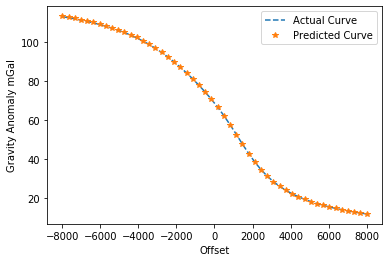

In [41]:
plt.plot(x, g, "--", markersize=1, label="Actual Value")
plt.plot(x, ga, "*", lw=0.8, label="Predicted Value")
plt.xlabel("Offset")
plt.ylabel("Gravity Anomaly (mGal)")
plt.legend(("Actual Curve","Predicted Curve"))

In [50]:
#Results
print("Depth(z) = ", parent1[0])
print("Height(h) = ", parent1[1])
print("Angle(alpha) = ", parent1[2] * 180 / math.pi)
print("Density_Contrast(density) = ", parent1[3])
print("Thickness(t) = ",parent1[4])

Depth(z) =  2497.961106802537
Height(h) =  791.246100131721
Angle(alpha) =  30.20200224287394
Density_Contrast(density) =  0.5388614460281809
Thickness(t) =  2787.9742801350885
